<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [16]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [17]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [18]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [19]:
# Write a Python code that can perform the following tasks.
# Read the CSV file, located on a given file path, into a Pandas data frame, assuming that the first rows of the file are the headers for the data.

import pandas as pd

# Specify the file path to your CSV file
file_path = "dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  


In [20]:
# Write a Python code that identifies the columns with missing values in a pandas data frame.
# Count of missing values in each column
missing_count = df.isnull().sum()

# Filter and display columns with missing values and their counts
missing_columns_with_count = missing_count[missing_count > 0]
print("Columns with missing values and their counts:")
print(missing_columns_with_count)

Columns with missing values and their counts:
Screen_Size_cm    4
Weight_kg         5
dtype: int64


In [21]:
# Write a Python code to replace the missing values in a pandas data frame, per the following guidelines.
# 1. For a categorical attribute "Screen_Size_cm", replace the missing values with the most frequent value in the column.
# 2. For a continuous value attribute "Weight_kg", replace the missing values with the mean value of the entries in the column.

# 1. Replace missing values in the categorical attribute "Screen_Size_cm" with the most frequent value
most_frequent_screen_size = df['Screen_Size_cm'].mode()[0]  # Get the most frequent value
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(most_frequent_screen_size)

# 2. Replace missing values in the continuous attribute "Weight_kg" with the mean value
mean_weight = df['Weight_kg'].mean()  # Calculate the mean value
df['Weight_kg'] = df['Weight_kg'].fillna(mean_weight)

# Display the DataFrame after replacing missing values
print("DataFrame after replacing missing values:")
print(df)

DataFrame after replacing missing values:
     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            3

In [22]:
# Write a Python code snippet to change the data type of the attributes "Screen_Size_cm" and "Weight_kg" of a data frame to float.
# Change the data type of "Screen_Size_cm" and "Weight_kg" to float
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype(float)
df['Weight_kg'] = df['Weight_kg'].astype(float)

# Display the DataFrame to verify the changes
print("Data types after conversion:")
print(df.dtypes)
print("\nDataFrame after changing data types:")
print(df)

Data types after conversion:
Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

DataFrame after changing data types:
     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234  

In [23]:
# Write a Python code to modify the contents under the following attributes of the data frame as required.
# 1. Data under 'Screen_Size_cm' is assumed to be in centimeters. Convert this data into inches. Modify the name of the attribute to 'Screen_Size_inch'.
# 2. Data under 'Weight_kg' is assumed to be in kilograms. Convert this data into pounds. Modify the name of the attribute to 'Weight_pounds'.

# Conversion factors
cm_to_inch = 0.393701
kg_to_pounds = 2.20462

# 1. Convert 'Screen_Size_cm' to inches and rename the attribute
df['Screen_Size_inch'] = df['Screen_Size_cm'] * cm_to_inch

# 2. Convert 'Weight_kg' to pounds and rename the attribute
df['Weight_pounds'] = df['Weight_kg'] * kg_to_pounds

# Optionally, drop the original columns if no longer needed
df.drop(columns=['Screen_Size_cm', 'Weight_kg'], inplace=True)

# Display the DataFrame to verify the changes
print("DataFrame after converting and renaming attributes:")
print(df)

DataFrame after converting and renaming attributes:
     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  \
0           

In [24]:
# Write a Python code to normalize the content under the attribute "CPU_frequency"
# in a data frame df concerning its maximum value. Make changes to the original data, 
# and do not create a new attribute.
 
# Normalize the 'CPU_frequency' column concerning its maximum value
max_cpu_frequency = df['CPU_frequency'].max()  # Find the maximum value
df['CPU_frequency'] = df['CPU_frequency'] / max_cpu_frequency  # Normalize the column

# Display the DataFrame to verify the changes
print("DataFrame after normalizing 'CPU_frequency':")
print(df)


DataFrame after normalizing 'CPU_frequency':
     Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0             0         Acer         4  IPS Panel    2   1         5   
1             1         Dell         3    Full HD    1   1         3   
2             2         Dell         3    Full HD    1   1         7   
3             3         Dell         4  IPS Panel    2   1         5   
4             4           HP         4    Full HD    2   1         7   
..          ...          ...       ...        ...  ...  ..       ...   
233         233       Lenovo         4  IPS Panel    2   1         7   
234         234      Toshiba         3    Full HD    2   1         5   
235         235       Lenovo         4  IPS Panel    2   1         5   
236         236       Lenovo         3    Full HD    3   1         5   
237         237      Toshiba         3    Full HD    2   1         5   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Price  Screen_Size_inch  \
0         0.551724 

In [25]:
# Write a Python code to perform the following tasks.
# 1. Convert a data frame df attribute "Screen", into indicator variables, 
# saved as df1, with the naming convention "Screen_<unique value of the attribute>".
# 2. Append df1 into the original data frame df.
# 3. Drop the original attribute from the data frame df.

# 1. Convert the "Screen" attribute into indicator variables
df1 = pd.get_dummies(df['Screen'], prefix='Screen')

# 2. Append the new indicator variables to the original DataFrame
df = pd.concat([df, df1], axis=1)

# 3. Drop the original "Screen" attribute from the DataFrame
df.drop(columns=['Screen'], inplace=True)

# Display the DataFrame to verify the changes
print("DataFrame after creating indicator variables and dropping the original 'Screen' attribute:")
print(df)

DataFrame after creating indicator variables and dropping the original 'Screen' attribute:
     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.551724   
1             1         Dell         3    1   1         3       0.689655   
2             2         Dell         3    1   1         7       0.931034   
3             3         Dell         4    2   1         5       0.551724   
4             4           HP         4    2   1         7       0.620690   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.896552   
234         234      Toshiba         3    2   1         5       0.827586   
235         235       Lenovo         4    2   1         5       0.896552   
236         236       Lenovo         3    3   1         5       0.862069   
237         237      Toshiba         3    2   1         5       0.793103 

In [26]:
# Create a prompt to generate a Python code that converts the values under Price from USD to Euros.

#Assume you have a Pandas DataFrame named df that contains a column called "Price" with values in USD.
# Convert the values in the "Price" column from USD to Euros. Use a conversion rate of 1 USD = 0.85 Euros.
# Update the original "Price" column with the converted values in Euros.
# Display the updated DataFrame to verify the changes.

# Conversion rate from USD to Euros
conversion_rate = 0.85

# Convert the 'Price' column from USD to Euros
df['Price'] = df['Price'] * conversion_rate

# Display the updated DataFrame to verify the changes
print("Updated DataFrame with prices in Euros:")
print(df)

Updated DataFrame with prices in Euros:
     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.551724   
1             1         Dell         3    1   1         3       0.689655   
2             2         Dell         3    1   1         7       0.931034   
3             3         Dell         4    2   1         5       0.551724   
4             4           HP         4    2   1         7       0.620690   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.896552   
234         234      Toshiba         3    2   1         5       0.827586   
235         235       Lenovo         4    2   1         5       0.896552   
236         236       Lenovo         3    3   1         5       0.862069   
237         237      Toshiba         3    2   1         5       0.793103   

     RAM_GB  Storage_GB_SSD    Price  Screen_Si

In [27]:
# Modify the normalization prompt to perform min-max normalization on the CPU_frequency parameter.

# Write a Python code snippet that performs the following tasks:
# Assume you have a Pandas DataFrame named df that contains a column called CPU_frequency.
# Perform min-max normalization on the CPU_frequency column. The min-max normalization formula is given by:
# [ \text{Normalized Value} = \frac{(x - \text{min}(X))}{(\text{max}(X) - \text{min}(X))} ]
# where (x) is the original value, and (X) is the set of values in the CPU_frequency column.
# Update the original CPU_frequency column with the normalized values.
# Display the updated DataFrame to verify the changes.

# Perform min-max normalization on the 'CPU_frequency' column
min_value = df['CPU_frequency'].min()  # Minimum value in the column
max_value = df['CPU_frequency'].max()  # Maximum value in the column

# Apply min-max normalization
df['CPU_frequency'] = (df['CPU_frequency'] - min_value) / (max_value - min_value)

# Display the updated DataFrame to verify the changes
print("Updated DataFrame after min-max normalization of 'CPU_frequency':")
print(df)

Updated DataFrame after min-max normalization of 'CPU_frequency':
     Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  CPU_frequency  \
0             0         Acer         4    2   1         5       0.235294   
1             1         Dell         3    1   1         3       0.470588   
2             2         Dell         3    1   1         7       0.882353   
3             3         Dell         4    2   1         5       0.235294   
4             4           HP         4    2   1         7       0.352941   
..          ...          ...       ...  ...  ..       ...            ...   
233         233       Lenovo         4    2   1         7       0.823529   
234         234      Toshiba         3    2   1         5       0.705882   
235         235       Lenovo         4    2   1         5       0.823529   
236         236       Lenovo         3    3   1         5       0.764706   
237         237      Toshiba         3    2   1         5       0.647059   

     RAM_GB  Storage_

## Authors


In [28]:
# With this, you have learned the process of using generative AI to create Python codes that can:
# Handle missing values in the data frame
# Modify the attribute data types
# Perform attribute transformations like standardization and normalization
# Convert categorical attributes into indicator variable attributes.

In [29]:
# Write a python code to perform the following actions.
# 1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
# 2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.

# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

import pandas as pd
# 1. Import a data set from a CSV file
#data = pd.read_csv('dataset.csv')
# 2. Generate the statistical description of all the features
#description = data.describe(include='all')
#print(description)

        Unnamed: 0 Manufacturer    Category   Screen         GPU          OS  \
count   238.000000          238  238.000000      238  238.000000  238.000000   
unique         NaN           11         NaN        2         NaN         NaN   
top            NaN         Dell         NaN  Full HD         NaN         NaN   
freq           NaN           71         NaN      161         NaN         NaN   
mean    118.500000          NaN    3.205882      NaN    2.151261    1.058824   
std      68.848868          NaN    0.776533      NaN    0.638282    0.235790   
min       0.000000          NaN    1.000000      NaN    1.000000    1.000000   
25%      59.250000          NaN    3.000000      NaN    2.000000    1.000000   
50%     118.500000          NaN    3.000000      NaN    2.000000    1.000000   
75%     177.750000          NaN    4.000000      NaN    3.000000    1.000000   
max     237.000000          NaN    5.000000      NaN    3.000000    2.000000   

          CPU_core  Screen_Size_cm  CPU

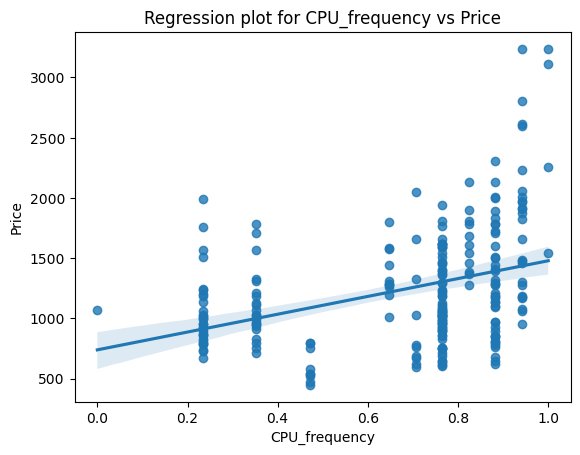

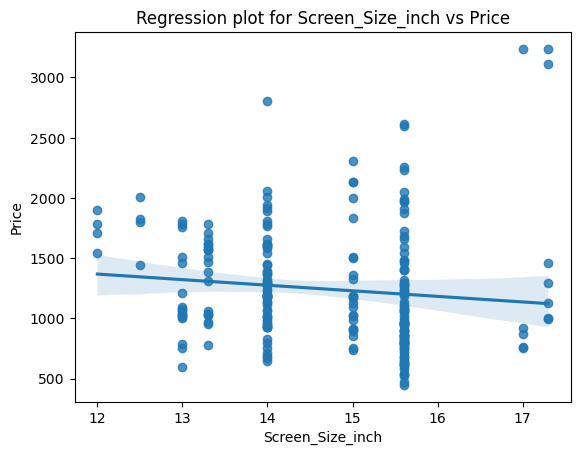

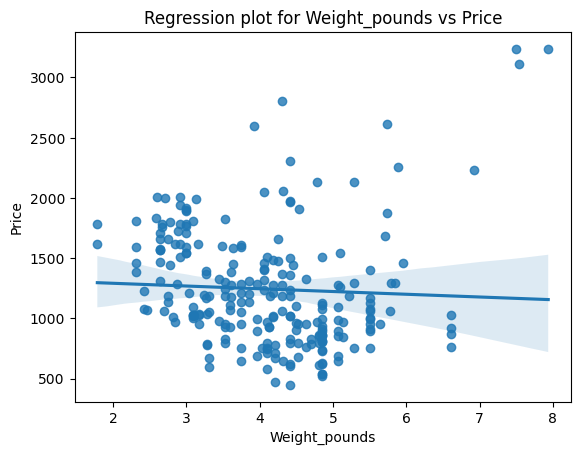

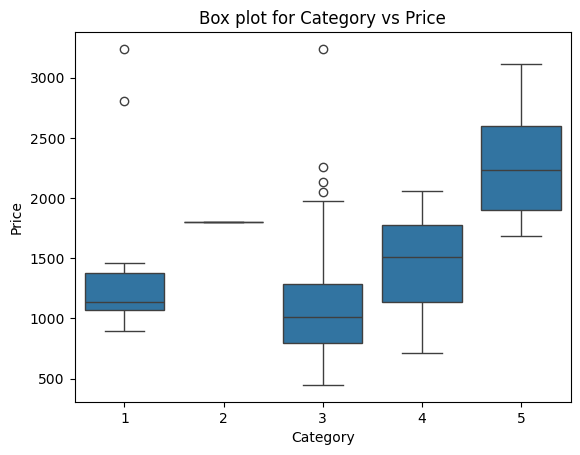

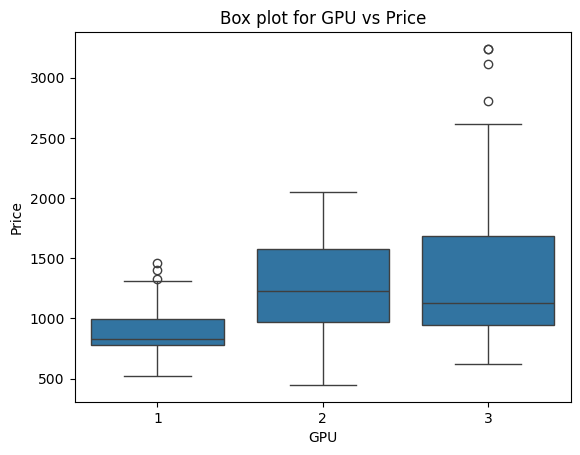

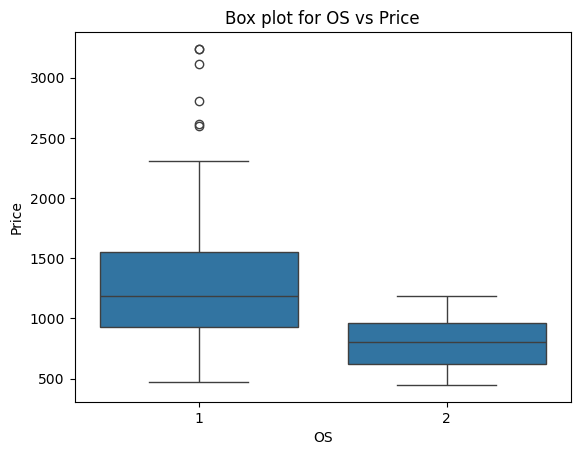

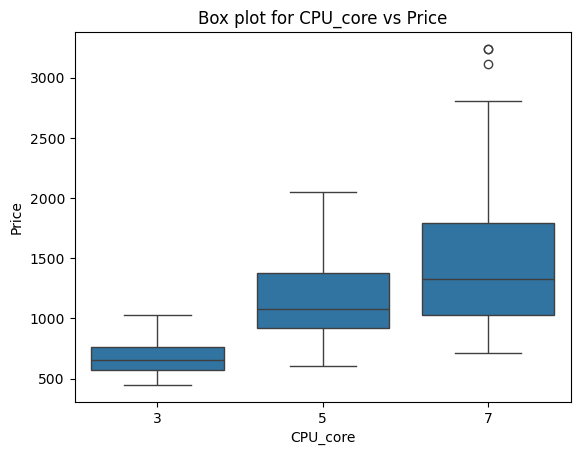

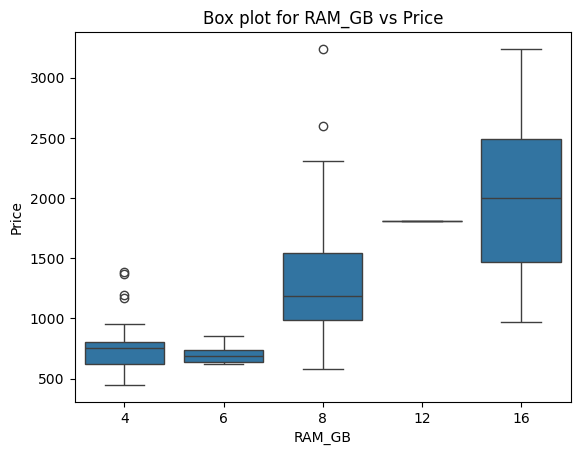

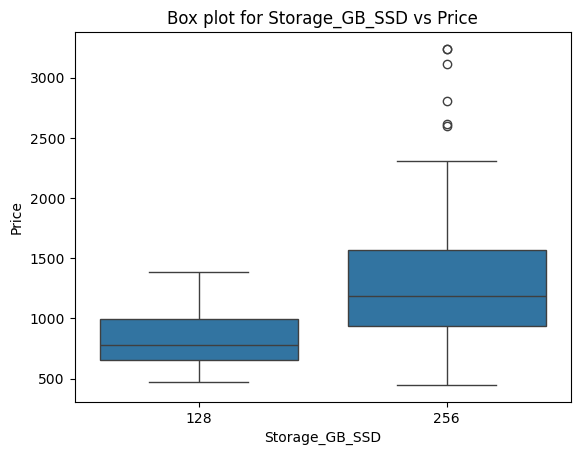

In [31]:
# Write a Python code to perform the following actions.
# 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
# 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create regression plots
# data = pd.read_csv('dataset.csv')

regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()


In [32]:
# Write a Python code for the following.
# 1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
# 2. Don't include the values evaluated for target variable against itself.
# 3. Print these values as a part of a single dataframe against each individual attrubute.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Attribute': correlation_values.index, 'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)


                         Attribute  Correlation Value  Pearson Coefficient  \
Unnamed: 0              Unnamed: 0           0.321933             0.321933   
Category                  Category           0.286243             0.286243   
GPU                            GPU           0.288298             0.288298   
OS                              OS          -0.221730            -0.221730   
CPU_core                  CPU_core           0.459398             0.459398   
CPU_frequency        CPU_frequency           0.366666             0.366666   
RAM_GB                      RAM_GB           0.549297             0.549297   
Storage_GB_SSD      Storage_GB_SSD           0.243421             0.243421   
Screen_Size_inch  Screen_Size_inch          -0.110644            -0.110644   
Weight_pounds        Weight_pounds          -0.050312            -0.050312   

                       P-value  
Unnamed: 0        3.851058e-07  
Category          7.225696e-06  
GPU               6.166950e-06  
OS       

In [ ]:
# Write a Python code to perform the following actions.
# 1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
# 2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
